Title

Preliminary Data Analysis

In [1]:
install.packages("janitor")

library(tidyverse)
library(repr)
library(rvest)
library(stringr)
library(janitor)
library(repr)
library(tidymodels)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔

In [2]:
#Our dataset can successfully be loaded into R

stroke <- read_csv('stroke_prediction_dataset.csv') |> clean_names()
stroke

Rows: 15000 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): Patient Name, Gender, Marital Status, Work Type, Residence Type, S...
dbl  (8): Patient ID, Age, Hypertension, Heart Disease, Average Glucose Leve...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


patient_id patient_name          age gender hypertension heart_disease
1     18153      Mamooty Khurana       56  Male   0            1            
2     62749      Kaira Subramaniam     80  Male   0            0            
3     32145      Dhanush Balan         26  Male   1            1            
4      6154      Ivana Baral           73  Male   0            0            
5     48973      Darshit Jayaraman     51  Male   1            1            
6     29307      Advika Kota           62  Female 0            0            
7     25525      Elakshi Karan         40  Female 1            0            
8      4809      Shalv Dugar           61  Female 0            1            
9      7372      Raghav Handa          72  Female 1            1            
10    37504      Krish Kulkarni        82  Male   0            0            
11    15298      Neelofar Devan        41  Male   0            1            
12    36017      Anaya Koshy           72  Female 0            0            
13    66924      Ahana  Lalla          30  Female 0            1            
14    46821      Zaina Chaudhary       80  Female 0            0            
15    54426      Tara Swaminathan      42  Male   0            1            
16    86093      Azad Krishnan         86  Male   0            1            
17     9062      Mehul Ranganathan     31  Female 1            1            
18    29940      Nishith Bhattacharyya 63  Female 1            1            
19    53292      Vritika Lala          40  Female 0            1            
20    23954      Taran Khatri          25  Male   0            0            
21    73140      Nitara Kapadia        40  Female 1            1            
22    62785      Manjari Dhaliwal      33  Female 0            0            
23    44810      Saira Loyal           64  Female 1            1            
24    35165      Emir Rajan            69  Male   0            1            
25    79771      Nayantara Issac       80  Female 0            1            
26    36975      Jhanvi Brar           24  Female 0            0            
27    81347      Gokul Bhakta          47  Female 0            1            
28     6743      Yasmin Vala           83  Male   0            1            
29    30237      Aayush Choudhury      68  Female 0            0            
30    28610      Miraya Kaur           63  Male   0            1            
⋮     ⋮          ⋮                     ⋮   ⋮      ⋮            ⋮            
14971 67036      Stuvan Golla          79  Male   0            0            
14972 48818      Mamooty Bora          55  Female 0            0            
14973 11839      Chirag Kurian         30  Male   0            1            
14974 93264      Mannat Arya           58  Female 1            0            
14975 30150      Alisha Banerjee       20  Female 0            0            
14976 82924      Ivana Chadha          71  Male   1            1            
14977 75691      Zoya Kalla            77  Female 0            1            
14978 63196      Manikya Sundaram      45  Male   0            0            
14979 47876      Ayesha Kalita         35  Female 0            1            
14980 88153      Yashvi Ramanathan     83  Female 0            1            
14981 59360      Akarsh Maharaj        60  Female 0            1            
14982 12323      Pari Ravi             25  Male   0            0            
14983 59075      Rati Sabharwal        54  Female 1            1            
14984 40381      Sana Goel             18  Female 0            0            
14985 60199      Yuvaan Kapoor         65  Female 0            0            
14986 14080      Pihu Mani             75  Male   1            1            
14987 63763      Trisha Konda          79  Male   0            0            
14988 23753      Riaan Varkey          71  Male   0            0            
14989 67162      Saksham Tandon        50  Male   0            0            
14990 62556      Shlok Goswami         73  Female 0            0            
14

In [3]:
# Our data is tidy. Each value is atomic. 

glimpse(stroke)

Rows: 15,000
Columns: 22
$ patient_id               <dbl> 18153, 62749, 32145, 6154, 48973, 29307, 2552…
$ patient_name             <chr> "Mamooty Khurana", "Kaira Subramaniam", "Dhan…
$ age                      <dbl> 56, 80, 26, 73, 51, 62, 40, 61, 72, 82, 41, 7…
$ gender                   <chr> "Male", "Male", "Male", "Male", "Male", "Fema…
$ hypertension             <dbl> 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, …
$ heart_disease            <dbl> 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, …
$ marital_status           <chr> "Married", "Single", "Married", "Married", "D…
$ work_type                <chr> "Self-employed", "Self-employed", "Never Work…
$ residence_type           <chr> "Rural", "Urban", "Rural", "Urban", "Urban", …
$ average_glucose_level    <dbl> 130.91, 183.73, 189.00, 185.29, 177.34, 91.60…
$ body_mass_index_bmi      <dbl> 22.37, 32.57, 20.32, 27.50, 29.06, 37.47, 28.…
$ smoking_status           <chr> "Non-smoker", "Non-smoker", "Formerly Smoked"…
$ alcohol_intak

In [10]:
# Creating the Training Data. 

set.seed(100)

stroke <- stroke |> mutate(diagnosis = as_factor(diagnosis))

stroke_split <- initial_split(stroke, prop = 0.75, strata = diagnosis) 
stroke_train <- training(stroke_split) 
stroke_test <- testing(stroke_split)


In [12]:
#There is an equal amount of diagnosis variables in each data set. The training set has 75% of the values.

stroke_train_diagnosis_amt <- stroke_train |> 
    group_by(diagnosis) |> 
    summarise(count = n())
stroke_train_diagnosis_amt

stroke_test_diagnosis_amt <-stroke_test |> 
    group_by(diagnosis) |> 
    summarise(count = n())
stroke_test_diagnosis_amt

sum(is.na(stroke_train)) #there are 1873 missing values in the training data set. 
nrow(stroke_train) # there are 11250 rows in training data set.

diagnosis count
1 Stroke    5601 
2 No Stroke 5649

diagnosis count
1 Stroke    1867 
2 No Stroke 1883

[1] 1873

[1] 11250

`summarise()` has grouped output by 'family_history_of_stroke'. You can
override using the `.groups` argument.


family_history_of_stroke diagnosis count
1 No                       Stroke    3723 
2 No                       No Stroke 3685 
3 Yes                      Stroke    3745 
4 Yes                      No Stroke 3847

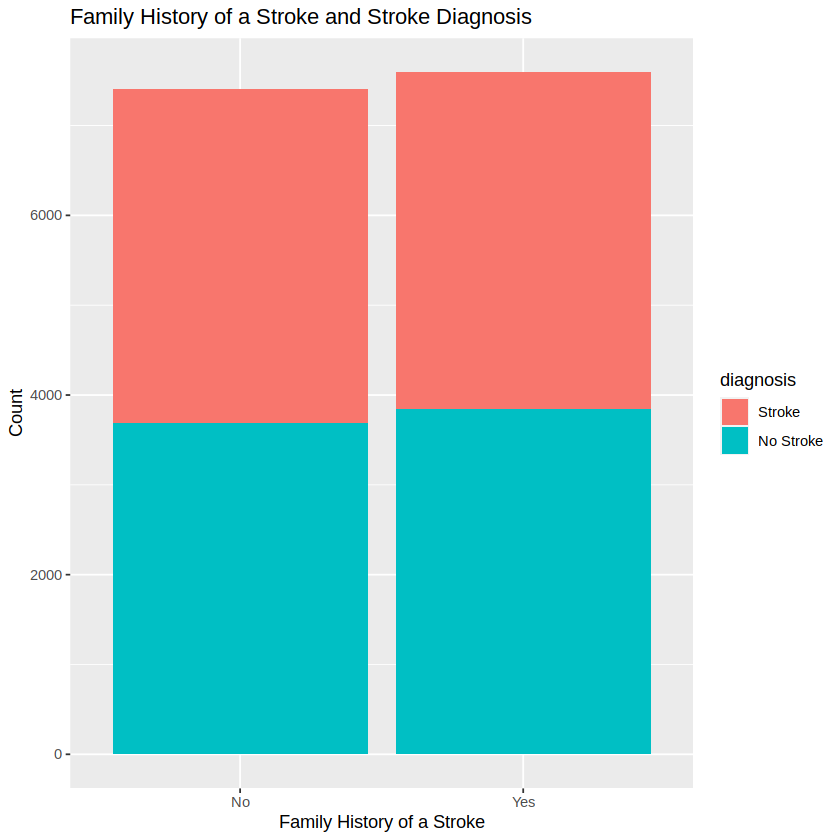

In [14]:
add_family_history_count <- stroke|>
    group_by(family_history_of_stroke, diagnosis) |>
    summarize(count = n())
add_family_history_count

stroke_bar<- ggplot(add_family_history_count, aes(x = family_history_of_stroke, y = count, fill = diagnosis)) + 
    geom_bar(stat = "identity") + 
    labs(x = 'Family History of a Stroke', y = "Count", color = 'Stroke Diagnosis') + 
    ggtitle('Family History of a Stroke and Stroke Diagnosis')
stroke_bar

In [17]:
# standardzie our training dataset
  
stroke_train_recipe <- recipe(diagnosis ~ stress_levels + average_glucose_level, data = stroke) |>
                       step_scale(all_predictors()) |>
                       step_center(all_predictors())
stroke_train_recipe
stroke_train_scaled <- stroke_train_recipe |>  
                           prep() |> 
                           bake(stroke_train)
stroke_train_scaled

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

stress_levels average_glucose_level diagnosis
1      0.11391598    1.37929949           No Stroke
2      0.47239843   -1.27483386           No Stroke
3     -1.20516024   -0.85322530           No Stroke
4     -0.30721390    0.16337743           No Stroke
5     -0.61349017   -1.59394239           No Stroke
6      1.13715716   -1.01302655           No Stroke
7      0.21832834   -1.39783390           No Stroke
8      1.17544169    0.49434138           No Stroke
9      1.43647261   -1.12836996           No Stroke
10     1.47475714    0.79986557           No Stroke
11     1.66269940    0.80776919           No Stroke
12     1.51652209   -0.15424918           No Stroke
13     0.09999433    0.89446199           No Stroke
14    -0.50211698    0.07322680           No Stroke
15     0.37842730    0.34392567           No Stroke
16    -0.22020359    1.66802849           No Stroke
17     0.01646444   -1.59591829           No Stroke
18     0.90744996    1.73817309           No Stroke
19     1.52000250   -0.30664079           No Stroke
20    -0.84667778   -0.45483361           No Stroke
21     1.33206024    0.80752220           No Stroke
22    -0.12623246    1.19825726           No Stroke
23    -0.59608811   -0.34591189           No Stroke
24     1.28681488    0.75343182           No Stroke
25    -1.12511076    1.39930552           No Stroke
26     0.92485202    0.85741378           No Stroke
27     1.16848087    0.78430533           No Stroke
28     0.56636956    1.61418510           No Stroke
29    -1.40006332    0.04507016           No Stroke
30     0.57333039   -0.58894811           No Stroke
⋮     ⋮             ⋮                     ⋮        
11221 -1.61932929    1.6806249            Stroke   
11222  1.47823755    0.5089137            Stroke   
11223  1.27985406    1.5084742            Stroke   
11224 -0.08794793   -0.2192070            Stroke   
11225 -1.20864065    0.8144379            Stroke   
11226 -1.74462413    1.5282333            Stroke   
11227 -0.95457056    1.2711187            Stroke   
11228 -1.02417880   -0.1046046            Stroke   
11229 -0.19584071    1.0322813            Stroke   
11230  0.51068297    0.3992510            Stroke   
11231 -0.85015820    0.6316667            Stroke   
11232  1.01186232   -0.1836408            Stroke   
11233  1.30769736    0.3377510            Stroke   
11234 -1.42442621    0.5333655            Stroke   
11235 -0.83971696    0.7517029            Stroke   
11236 -0.47775409   -1.6892798            Stroke   
11237  1.20676540    1.2434561            Stroke   
11238 -0.17843864    0.1112630            Stroke   
11239  0.22528917   -0.2579841            Stroke   
11240  0.97009738    1.0579681            Stroke   
11241  0.57681080    1.6381429            Stroke   
11242 -0.96153139   -0.6936710            Stroke   
11243  1.35990354    0.5252149            Stroke   
11244 -1.16687570    1.5358899            Stroke   
11245  0.22528917    0.7509619            Stroke   
11246 -0.81187366   -1.2795266            Stroke   
11247 -0.47079327   -0.2915745            Stroke   
11248  0.16264175   -1.7100268            Stroke   
11249 -1.01373757    1.7374321            Stroke   
11250 -0.15755617    1.4185706            Stroke

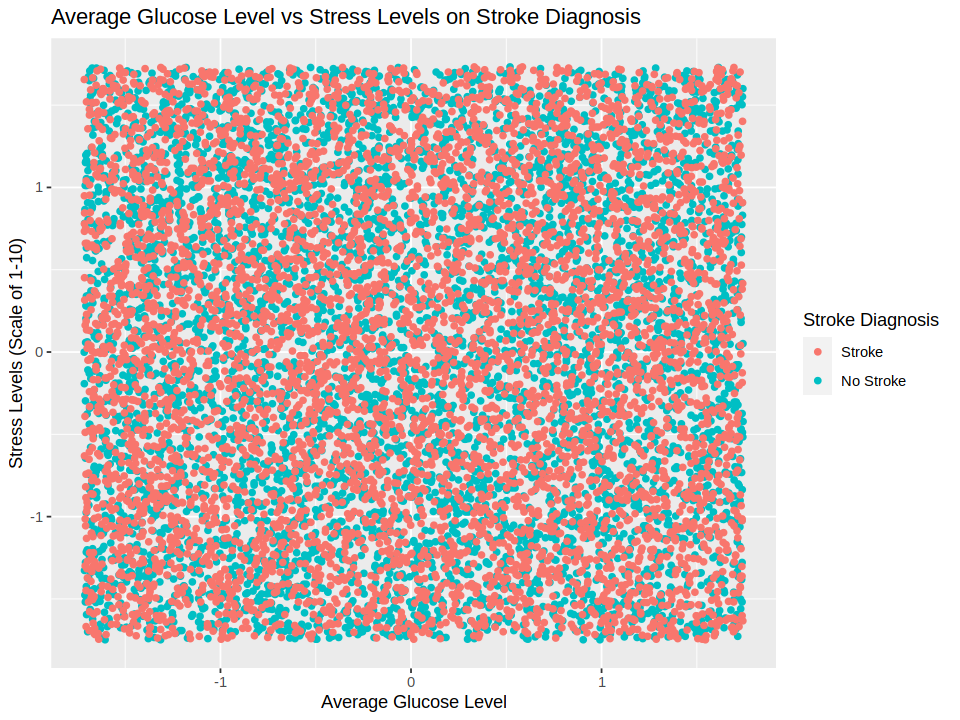

In [18]:
#Here are some plots that represent our dataset. 

options(repr.plot.width = 8, repr.plot.height = 6) 
stroke_scatterplot <- ggplot(stroke_train_scaled, aes(x = average_glucose_level, y = stress_levels, color = diagnosis)) + 
    geom_point() + 
    labs(x = 'Average Glucose Level', y = 'Stress Levels (Scale of 1-10)', color = 'Stroke Diagnosis') +
    ggtitle('Average Glucose Level vs Stress Levels on Stroke Diagnosis')

stroke_scatterplot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


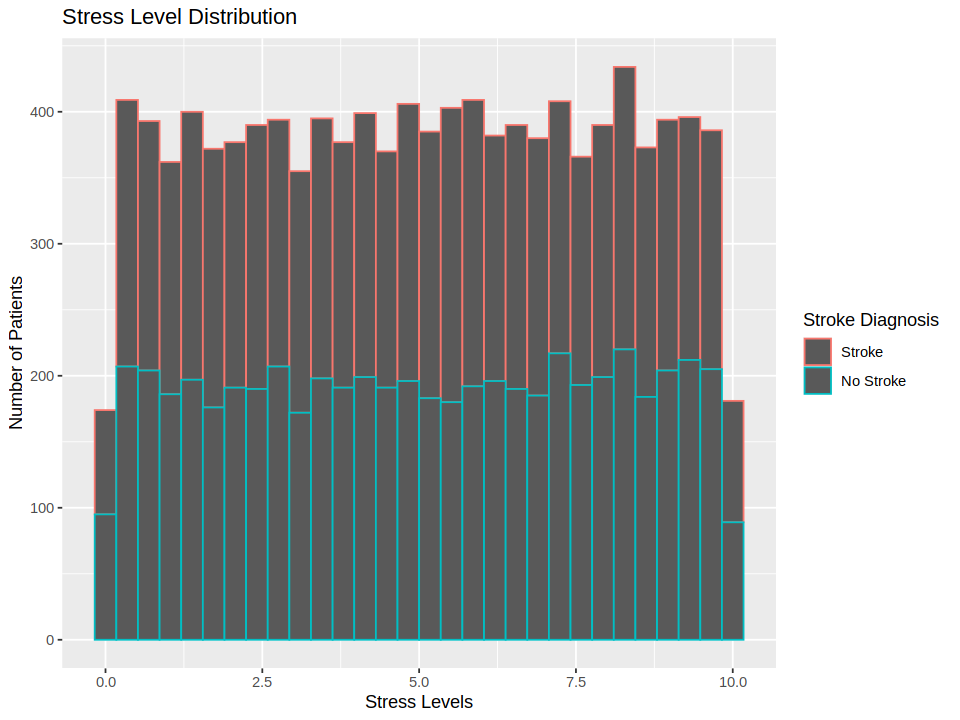

In [23]:
stroke_stress_histogram <- ggplot(stroke_train, aes(x = stress_levels, color = diagnosis)) + 
    geom_histogram() + 
    labs(x = 'Stress Levels', y = 'Number of Patients', color = 'Stroke Diagnosis') + 
    ggtitle('Stress Level Distribution')
stroke_stress_histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


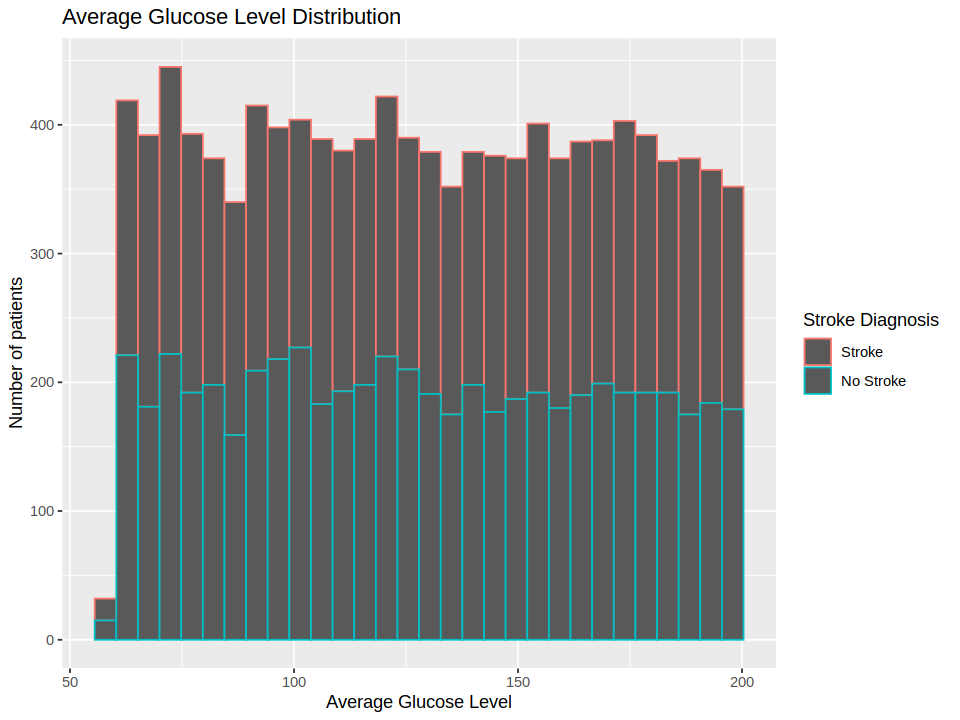

In [26]:
stroke_glucose_histogram <- ggplot(stroke_train, aes(x = average_glucose_level, color = diagnosis)) + 
    geom_histogram() + 
    labs(x = 'Average Glucose Level', y = 'Number of patients', color = 'Stroke Diagnosis') + 
    ggtitle('Average Glucose Level Distribution')
stroke_glucose_histogram